# Principles of Data Science

### Lecture 2: Learning from Data

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Learning from Data

- Today's lecture is an *overview* of a few *concepts* in Data Science
- The relevant details will become more familiar as you progress through the course

- Learning objectives
   - Understand <font color=blue>**data structures**</font>
   - Be able to evaluate and judge <font color=blue>**algorithm performance**</font>
   - Realise challenges in <font color=blue>**data quantity and quality**</font> and how to overcome them
   - Understand the importantance of and be able to implement <font color=blue>**train**, **test** and **validation**</font> sample splitting

## Data Structures

Our datasets will typically contain
- <font color=blue>*variables*</font> or <font color=blue>*features*</font> on one axis (normally the **columns**)
- <font color=blue>*events*</font> (normally i.i.d) on the other axis (normally the **rows**)

You will need to become well-versed in numpy arrays:
- array dimensions (using `.shape`)
- array slicing and splitting (using `[i:j:k]`)

In [1]:
import numpy as np

# let's randomly fill some arrays
# inspect them and slice them
#   - discuss scalars
#   - discuss arrays with 1D 
#   - discuss arrays with >1D


In [39]:
x = np.random.uniform(1,5, size=(10,4))
print(x, x.dtype, x.ndim)

[[4.37588499 3.08291031 3.34829696 4.33175654]
 [1.36149224 1.53806325 2.3336712  2.77203178]
 [4.08191704 3.4950401  1.31944777 2.62666578]
 [2.37245719 1.88453878 4.62212017 3.762384  ]
 [4.75529681 1.48818007 4.38957641 4.33470156]
 [4.68302507 2.56878561 2.05364268 4.92369948]
 [1.41893668 1.71502792 1.45006166 4.94576484]
 [3.61175271 3.9834952  1.10186115 4.41391832]
 [4.99531256 3.94931598 4.57655615 2.22580997]
 [2.97281653 4.76436572 3.01699959 3.03422761]] float64 2


In [53]:
print(x[[1,5,7],3])


[2.77203178 4.92369948 4.41391832]


## pandas.DataFrame

A really convenient (and commonly used) data storage architecture
- similar to an excel spreadsheet
- variables or features are the *columns*
- i.i.d events are the *rows*

In [2]:
import pandas as pd

# generate some dummy data
df = pd.DataFrame({
    'weight': np.random.normal(70,15,size=100),
    'height': np.random.normal(1.6,0.3,size=100),
    'iq': np.random.uniform(80,180, size=100),
    'distance': np.abs(np.random.normal(size=100)),
    'undergrad': np.random.normal(70,4, size=100)
})

print(df)

        weight    height          iq  distance  undergrad
0    63.335185  1.734319  172.312053  0.077338  67.237124
1    80.579758  1.229876  117.349213  0.242194  73.841990
2    76.408524  2.157314  101.894161  0.835163  65.325413
3    75.483045  1.247836  176.388759  0.366609  62.872488
4    91.814556  1.202183  129.202082  0.274639  75.328168
..         ...       ...         ...       ...        ...
95   74.284936  1.411648  124.560496  1.234666  75.287706
96   57.127462  1.471914  147.537093  0.759370  61.642244
97   47.096158  1.425461  148.010577  0.950900  76.507211
98  102.090910  1.838311   81.719715  0.761122  65.138460
99   80.362514  1.494528   99.529912  0.759216  70.897071

[100 rows x 5 columns]


## Other more complex structures

- A single event for a given feature may not always be a scalar
- Might be an array quantity itself and could be of different sizes

Example with collections of images:
- Each image is an i.i.d "event"
- Each image contains an array of pixels `(i x j)`
- The features could be the `(r,g,b)` arrays in each image

Words in a sentence (unequal length arrays)

Particles produced from a collision

## What do ML algorithms do?

- Build a model from our "training" (or learning) sample
- Based on a set of features in the data:

$$\vec{x}_i = \{ x_1, x_2, \dots, x_N \}$$

- the shape of $\vec{x}$ will be `(nevents, nfeatures)` often called `X`

- Learn the form of function $f$ to produce output $y$

$$ y_i = f(\vec{x}_i) $$

- $y$ can also be a vector (called a multi-class or multi-output algorithm)

- The algorithm "learns" by comparing its predicted output $y$ to some known output (at least in **supervised** learning)

## Correlation, correlation, correlation!

- ML algorithms are particuarly good at exploiting correlations between features
- Sometimes we may already know these exist but sometimes not
- It is cheap to try different feature sets

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# generate some data and store in dataframe
Ns = 5000
s_mu = [1,1]
s_cov = [[4,1],[1,4]]

Nb = 5000
b_mu = [-1,-1]
b_cov = [[4,-1],[-1,4]]

sx, sy = np.random.multivariate_normal(s_mu, s_cov, size=Ns).T
bx, by = np.random.multivariate_normal(b_mu, b_cov, size=Nb).T

df = pd.DataFrame({
    'x': np.concatenate((sx,bx)),
    'y': np.concatenate((sy,by)),
    'C': ['signal']*Ns + ['background']*Nb
})

## A quick example

In [4]:
print(df)

             x         y           C
0    -0.320356  1.869388      signal
1     0.639364  0.691900      signal
2    -0.842287 -3.983650      signal
3     1.145675  0.956642      signal
4    -1.913500  1.273072      signal
...        ...       ...         ...
9995 -0.276002 -0.898775  background
9996 -2.870820  3.589701  background
9997 -0.029411 -2.463587  background
9998  0.763058  0.427360  background
9999 -3.183695 -2.039460  background

[10000 rows x 3 columns]


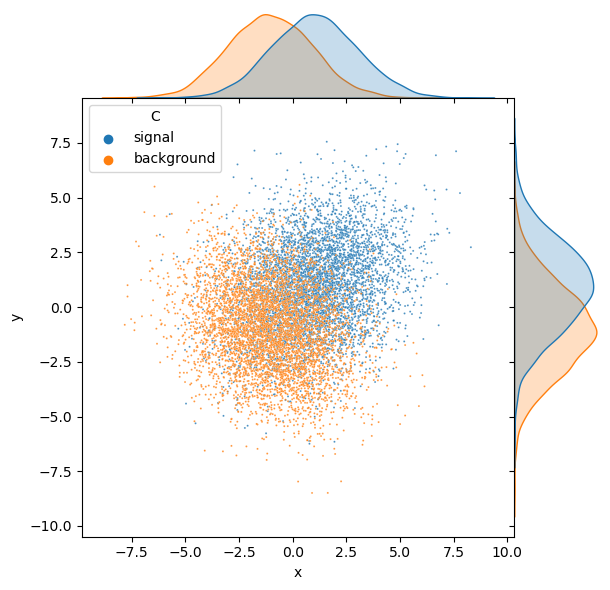

In [5]:
import seaborn as sns
_ = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)

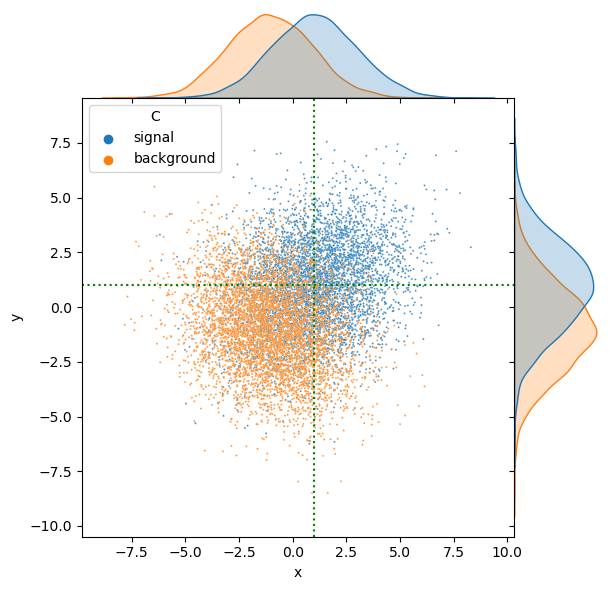

In [6]:
# picking some cut values by eye
splot = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)
_ = splot.ax_joint.axvline(1,c='g',ls=':')
_ = splot.ax_joint.axhline(1,c='g',ls=':')


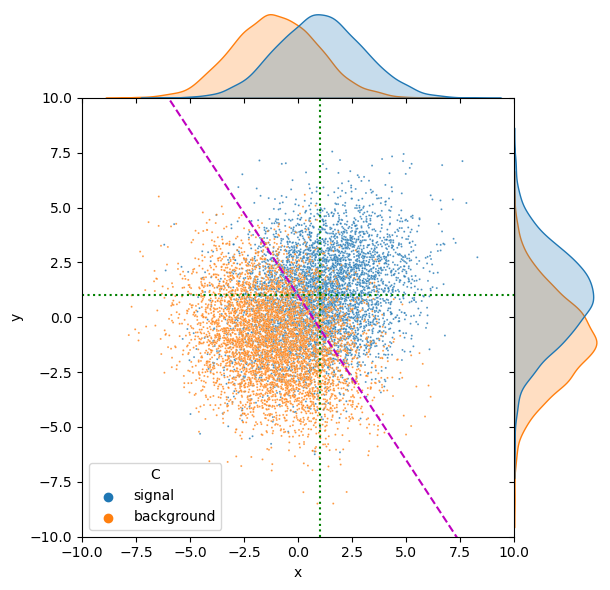

In [7]:
# picking a more sophisticated diagonal cut
splot = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)
_ = splot.ax_joint.axvline(1,c='g',ls=':')
_ = splot.ax_joint.axhline(1,c='g',ls=':')
x = np.linspace(-10,10)
y = -1.5*x + 1
_ = splot.ax_joint.plot(x,y, c='m', ls='--')
_ = splot.ax_joint.set_xlim(-10,10)
_ = splot.ax_joint.set_ylim(-10,10)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
df['P'] = 0
df.loc[df['C']=='signal', 'P'] = 1
print(df)

             x         y           C  P
0    -0.320356  1.869388      signal  1
1     0.639364  0.691900      signal  1
2    -0.842287 -3.983650      signal  1
3     1.145675  0.956642      signal  1
4    -1.913500  1.273072      signal  1
...        ...       ...         ... ..
9995 -0.276002 -0.898775  background  0
9996 -2.870820  3.589701  background  0
9997 -0.029411 -2.463587  background  0
9998  0.763058  0.427360  background  0
9999 -3.183695 -2.039460  background  0

[10000 rows x 4 columns]


In [9]:
X = df[['x','y']].to_numpy()
y = df['P'].to_numpy()
print(X.shape)
print(X)
print(y.shape)
print(y)

(10000, 2)
[[-0.32035648  1.86938825]
 [ 0.6393639   0.69190004]
 [-0.8422873  -3.98365017]
 ...
 [-0.02941114 -2.46358722]
 [ 0.76305827  0.42736025]
 [-3.18369539 -2.03946017]]
(10000,)
[1 1 1 ... 0 0 0]


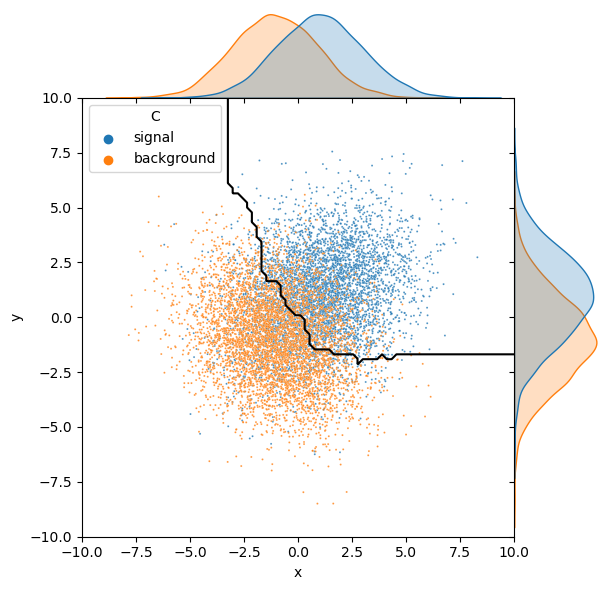

In [10]:
# create random forest and train it
clf = RandomForestClassifier(n_estimators=500, max_depth=5)
clf.fit(X, y)

# draw the decision boundary
splot = sns.jointplot( df, x='x', y='y', hue='C', s=2, alpha=0.8, space=0)
splot.ax_joint.set_xlim(-10,10)
splot.ax_joint.set_ylim(-10,10)

nx, ny = np.meshgrid( np.linspace(-10,10,100), np.linspace(-10,10,100) )
NX = np.vstack( [nx.ravel(), ny.ravel()] ).T
disp = DecisionBoundaryDisplay.from_estimator( clf, NX, response_method="predict", 
                                               plot_method="contour", levels=[0.9], zorder=100,
                                               colors='k', ax=splot.ax_joint)

# <font color="darkred">*Musical interlude...*</font>

## Performance criteria and metrics
- for demonstrative purposes I will train a Boosted Decision Tree on the data above

In [11]:
## To demonstrate criteria and metrics will train a BDT classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.05)
clf.fit(X,y)

df['T'] = clf.predict(X)
pred_prob = clf.predict_proba(X)
df[['Pb','Ps']] = pred_prob
print(df)  

             x         y           C  P  T        Pb        Ps
0    -0.320356  1.869388      signal  1  1  0.255224  0.744776
1     0.639364  0.691900      signal  1  1  0.237050  0.762950
2    -0.842287 -3.983650      signal  1  0  0.864395  0.135605
3     1.145675  0.956642      signal  1  1  0.209812  0.790188
4    -1.913500  1.273072      signal  1  0  0.536729  0.463271
...        ...       ...         ... .. ..       ...       ...
9995 -0.276002 -0.898775  background  0  0  0.652628  0.347372
9996 -2.870820  3.589701  background  0  0  0.650099  0.349901
9997 -0.029411 -2.463587  background  0  0  0.762106  0.237894
9998  0.763058  0.427360  background  0  1  0.305070  0.694930
9999 -3.183695 -2.039460  background  0  0  0.848226  0.151774

[10000 rows x 7 columns]


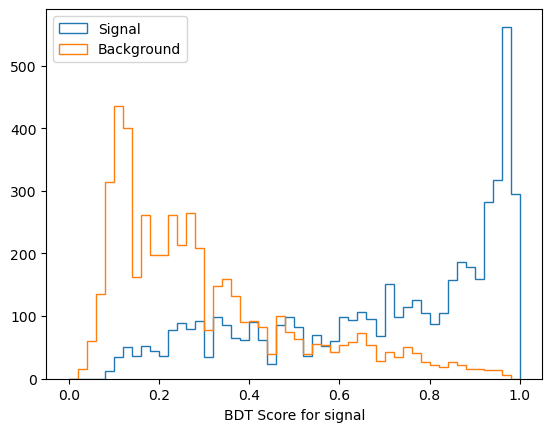

In [12]:
plt.hist( df[df['P']==1]['Ps'], bins=50, range=(0,1), histtype='step', label='Signal')
plt.hist( df[df['P']==0]['Ps'], bins=50, range=(0,1), histtype='step', label='Background')
plt.xlabel('BDT Score for signal')
plt.legend()

## Performance criteria and metrics
<font color="red">*In order to evaluate performance you always need a reference sample which contains the true (target) values as well as the algorithm prediction*</font>
    
- **<font color="blue">True postitive (TP)</font>**: correct prediction of positive outcome
- **<font color="blue">False positive (FP)</font>**: incorrect prediction of positive outcome
- **<font color="blue">True negative (TN)</font>**: correct prediction of negative outcome
- **<font color="blue">False negative (FN)</font>**: incorrect prediction of negative outcome

- All postive outcomes:
$$ P = TP + FN $$

- All negative outcomes:
$$ N = TN + FP $$

- Events classified as positive:
$$ C_P = TP + FP $$

- Events classified as negative:
$$ C_N = TN + FN $$


In [13]:
# In our example

P  = (df['P'].values).sum()
N  = (df['P'].values==0).sum()
Cp = (df['T'].values).sum()
Cn = (df['T'].values==0).sum()

TP = (df[ df['T']==1 ]['P'].values).sum()
FP = (df[ df['T']==1 ]['P'].values==0).sum()
TN = (df[ df['T']==0 ]['P'].values==0).sum()
FN = (df[ df['T']==0 ]['P'].values).sum()


print('P: ', P)
print('N: ', N)
print('Cp:', Cp)
print('Cn:', Cn)

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

## An important lesson : PUT assert statements in your code!
assert( P == (TP+FN) )
assert( N == (TN+FP) )
assert( Cp == (TP+FP) )
assert( Cn == (TN+FN) )  

P:  5000
N:  5000
Cp: 4561
Cn: 5439
TP: 3687
FP: 874
TN: 4126
FN: 1313


### *Performance criteria*

- **Recall: True positive rate**, *signal efficiency*, *sensitivity*
    $$ s = TPR = \frac{TP}{TP + FN} $$
- **Specificity: True negative rate**, *background efficiency*
    $$ s' = TNR = \frac{TN}{TN + FP} $$
- **False positive rate** *1-specificity*
    $$ FPR = \frac{FP}{FP+TN} = 1 - TNR $$
- **False negative rate** *1-sensitivity*
    $$ FNR = \frac{FN}{FN+TP} = 1 - TPR $$
    
- A <font color="blue">high FPR</font> is indicative of a so-called <font color="blue">"Type-I" error</font>
- A <font color="blue">high FNR</font> is indicative of a so-called <font color="blue">"Type-II" error</font>
- *<font color="green">We will discuss this more when we do **Hypothesis Testing**</font>*
- Generally considered more desirable to lower the FPR at the risk of a high FNR (think Covid tests, fake discoveries etc.)

In [14]:
# In our example
TPR = TP / ( TP+FN )
TNR = TN / ( TN+FP )
FPR = FP / ( FP+TN )
FNR = FN / ( FN+TP )

print('TPR:', TPR)
print('TNR:', TNR)
print('FPR:', FPR)
print('FNR:', FNR)

assert( abs(FPR - (1-TNR))<0.001 )
assert( abs(FNR - (1-TPR))<0.001 )

TPR: 0.7374
TNR: 0.8252
FPR: 0.1748
FNR: 0.2626


### *Performance criteria*

- **Precision** or **purity**, fraction of positive outcomes correctly classified
    $$ p = \frac{TP}{FP+TP} $$
- **Accuracy**, fraction of all events correctly classified
    $$ \alpha = \frac{TP+TN}{TP+TN+FP+FN} $$
- **Error rate**, fraction of events incorrectly classified
    $$ \varepsilon = \frac{FP+FN}{TP+TN+FP+FN} = 1-\alpha $$
- **Significance**
    $$ \sigma = \frac{TP}{\sqrt{TP+FP}} $$
- **F-score**
    $$ F = 2 \frac{p s}{p + s} = \frac{2 \;TPR}{ 2\; TPR + FPR + FNR} $$

In [15]:
# In our example
p = TP / (FP+TP)
a = (TP+TN) / (TP+TN+FP+FN)
e = (FP+FN) / (TP+TN+FP+FN)
s = TP / (TP+FP)**0.5
F = (2*TPR) / (2*TPR + FPR + FNR)

print('p: ', p)
print('a: ', a)
print('e: ', e)
print('s: ', s)
print('F: ', F)
 
assert( abs(e - (1-a)) < 0.001 )

p:  0.8083753562815172
a:  0.7813
e:  0.2187
s:  54.59377197638897
F:  0.7712582365861311


## Receiver Operating Characteristic (ROC)

- Plot of FPR = 1 - specificity *vs* TPR = sensitivity
- Better performance has line nearer top-left
- Area under ROC (AUC) is a good metric for performance

In [16]:
plt.style.use('../mphil.mplstyle')

<table>
    <tr>
        <td> <img src="plots/roc1.png" alt="drawing"/> </td>
        <td> <img src="plots/roc2.png" alt="drawing"/> </td>
    </tr>
</table>   

0.86647816


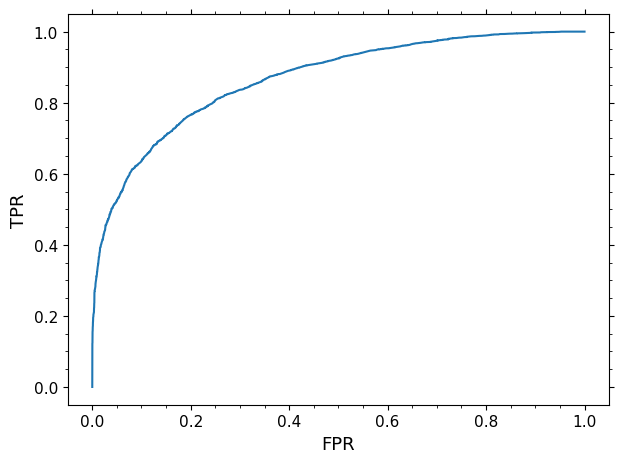

In [17]:
## In our example
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve( df['P'], df['Ps'])
plt.plot( fpr, tpr )
plt.xlabel('FPR')
plt.ylabel('TPR') 
auc = roc_auc_score( df['P'], df['Ps'])
print(auc)

## Data challenges

<font color="green">*Some discussion in the lectures*</font>
- Data quantity
- Data quality
    - resolution
    - missing data
    - missing (hidden) variables
    - biases



## Representativeness

<font color="green">*Some discussion in the lectures*</font>
- sample $S$ may not necessarily be "representative" of population $P$
- random sampling
- stratified sampling
    
<img src="plots/stratified_sample.png" alt="drawing">


## Overfitting

$$ y_i = f( \vec{x}_i; \vec{w}, \vec{b} ) $$

- Learnt (or fitted) ML model will always depends on the sample it was trained on
- Should not "overlearn" on statistical fluctations
- **Split sample** into *train* and *test*


<table>
    <tr>
        <td> <img src="plots/overfit1.png" alt="drawing"/> </td>
        <td> <img src="plots/overfit2.png" alt="drawing"/> </td>
    </tr>
</table>   

## Hyperparameter tuning

- ML models have "hyperparameters" (not the same as $\vec{w}$ and $\vec{b}$)
    - *e.g.* no. of nodes, no. of layers, learning rate, activation function *etc.*
- Also want to make best choice for these (maximise AUC)

<img src="plots/hyperpar.png" alt="drawing" width=700>


## Train, test and validation samples

Crucial aspect for controlling our learning (avoid overfitting, optimise hyperparameters)

- **<font color="blue">Training sample</font>** - the one used to fit the model
- **<font color="blue">Validation sample</font>** - the one used to optmize the hyperparameters
- **<font color="blue">Test sample</font>** - the one used to evaluate the performance

Let's see an example

In [18]:
# make a dummy dataset using scikit-learn and inspect it

import pandas as pd
from sklearn.datasets import make_classification

X, y = make_classification( n_samples=5000, n_features=5, n_informative=4, n_redundant=0)

df = pd.DataFrame( data=X,
                   columns=[ f'Feature {i}' for i in range(5)])
df['target'] = y
 
print(df)

      Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  target
0     -0.663402  -1.948584  -0.748114  -0.483842   2.517809       0
1     -1.433235   0.627260  -1.345170  -1.795795  -0.048371       1
2     -0.920761  -0.365301   0.010224  -1.047719   0.651241       0
3     -2.311315  -1.328779  -2.279937   1.377719   0.666924       1
4     -1.611649   0.369609  -1.985887  -1.731139   0.975764       0
...         ...        ...        ...        ...        ...     ...
4995  -1.076987  -0.791288  -1.610832  -1.347049   0.584668       0
4996  -0.502501  -2.061954   0.535535  -0.986249  -1.025836       0
4997  -1.265284  -2.132740   0.979852   4.577609  -1.967290       0
4998  -0.407619  -2.330127  -1.747416  -0.366333   1.416678       0
4999  -0.867997  -2.135538  -2.023176   0.400289   0.460324       1

[5000 rows x 6 columns]


In [19]:
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

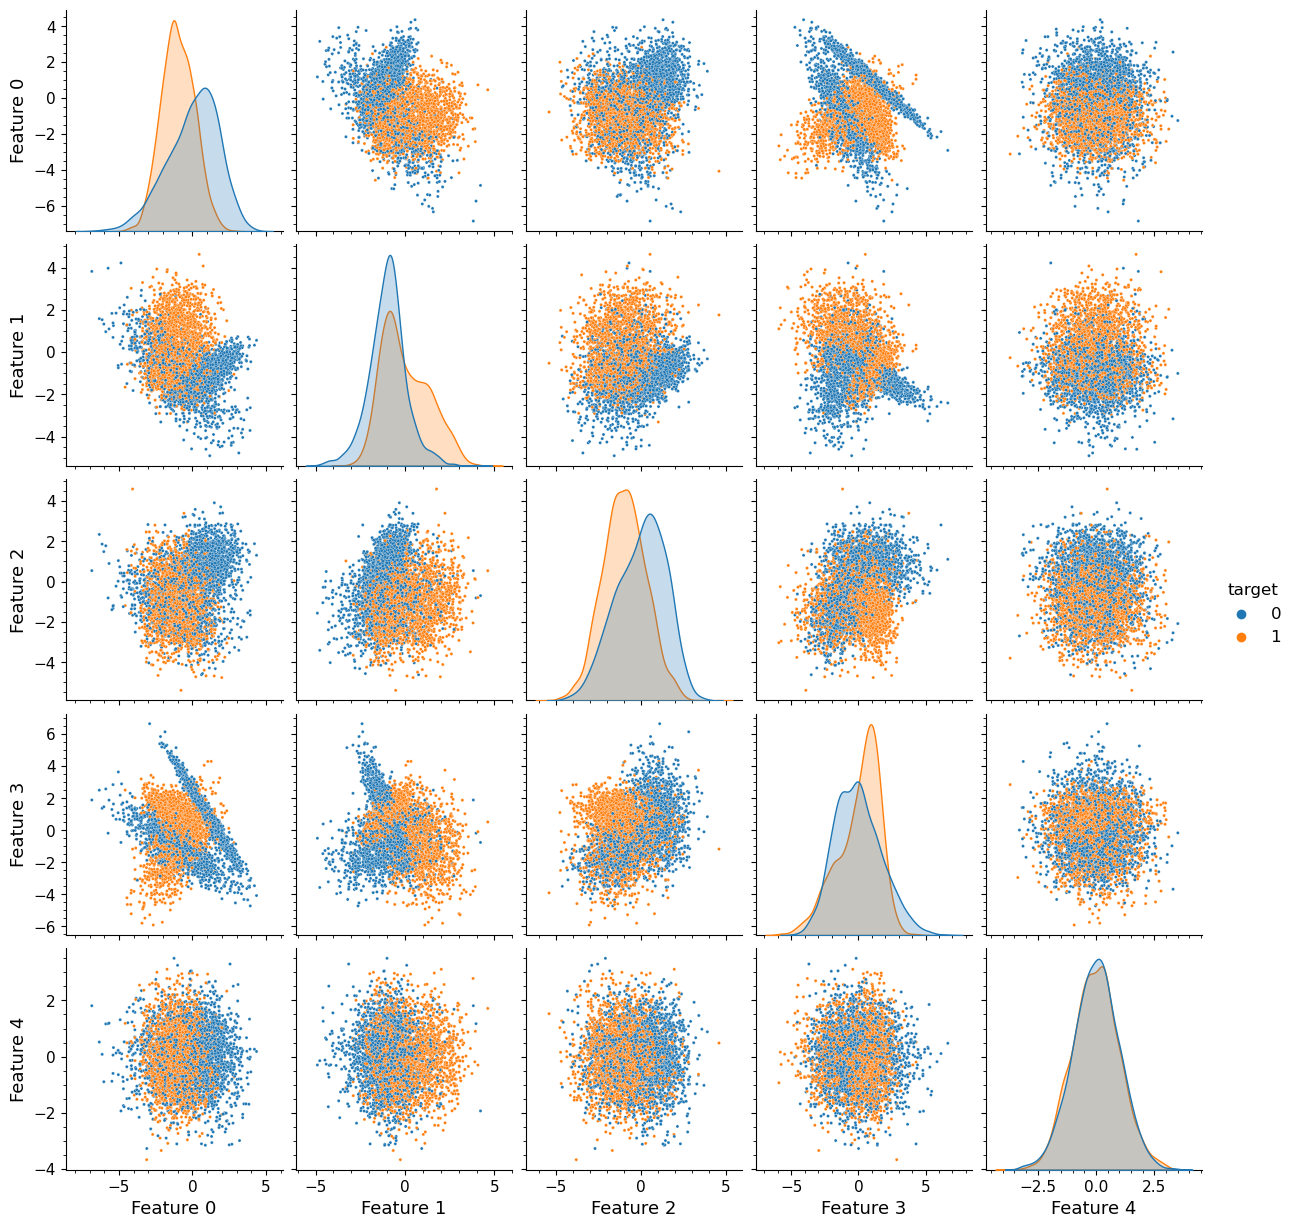

In [20]:
# make some plots of it
import seaborn as sns
g = sns.pairplot(df, hue='target', plot_kws=dict(s=5))

In [21]:
# split the data up into training, validation and test samples
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]].to_numpy()
y = df['target'].to_numpy()

# get 50% training sample
X_train, X_temp, y_train, y_temp = train_test_split( X, y, test_size=0.5) 

# split remaining 50% of temp into 25% val and 25% test
X_val, X_test, y_val, y_test = train_test_split( X_temp, y_temp, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)

(2500, 5) (1250, 5) (1250, 5)


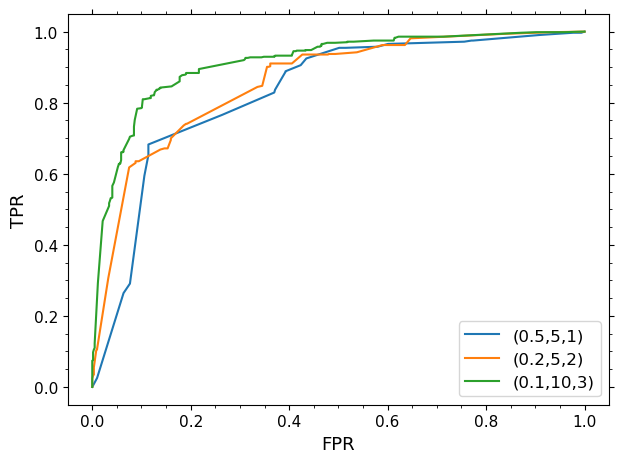

In [22]:
## now perform the training using a simple gradient boosted decision tree
## and plot the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')

# a few different hyperparameter choices
hyperpar_opts = [
    {'learning_rate': 0.5, 'n_estimators': 5 , 'max_depth': 1 },
    {'learning_rate': 0.2, 'n_estimators': 5 , 'max_depth': 2 },
    {'learning_rate': 0.1, 'n_estimators': 10, 'max_depth': 3 },
]

models = []
for hpars in hyperpar_opts:
    clf = GradientBoostingClassifier( **hpars )
    clf.fit(X_train, y_train)
    # this [:,1] is because `predict_proba` returns the probability for each class
    y_val_pred = clf.predict_proba(X_val)[:,1]
    fpr, tpr, _ = roc_curve( y_val, y_val_pred )
    label = '(' + ','.join([f'{p}' for p in hpars.values()]) + ')'
    plt.plot(fpr, tpr, label=label)
    models.append( clf )

plt.xlabel('FPR')
plt.ylabel('TPR')
_ = plt.legend()


In [23]:
## see the most optimal we found was the last one so use that one for actual evaluation
best_clf = models[-1]

y_train_pred = best_clf.predict_proba( X_train )[:,1] # returns as prob for each class
y_test_pred  = best_clf.predict_proba( X_test )[:,1]
y_val_pred   = best_clf.predict_proba( X_val )[:,1]

In [24]:
## Compare training and testing scores
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score( y_train, y_train_pred )
auc_test  = roc_auc_score( y_test, y_test_pred )
auc_val   = roc_auc_score( y_val, y_val_pred )

print('Train:', auc_train)
print('Test: ', auc_test)
print('Val:  ', auc_val)

Train: 0.9280931609005281
Test:  0.9147543173998731
Val:   0.9128434023723189


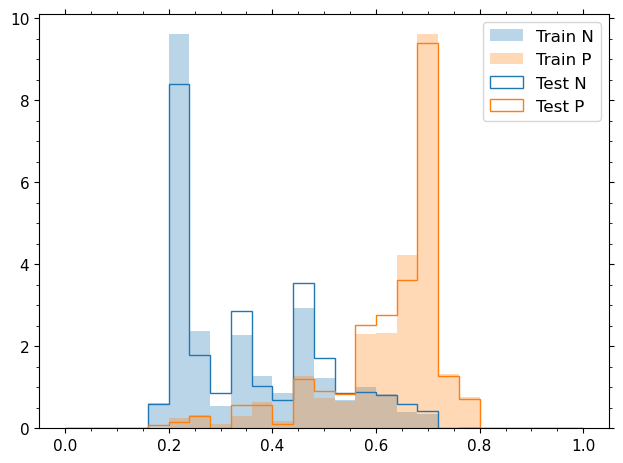

In [25]:
# Maybe we are a bit over-trainined?
# doesn't look too bad

plt.hist( y_train_pred[y_train==0], range=(0,1), bins=25, alpha=0.3, density=True, label='Train N' )
plt.hist( y_train_pred[y_train==1], range=(0,1), bins=25, alpha=0.3, density=True, label='Train P' )

plt.hist( y_test_pred[y_test==0], range=(0,1), bins=25, ec='C0', histtype='step', density=True, label='Test N')
plt.hist( y_test_pred[y_test==1], range=(0,1), bins=25, ec='C1', histtype='step', density=True, label='Test P')

_ = plt.legend()


## Cross-validation

- A way to keep a large training sample
- and have separate samples to assess overfitting and tune hyperparameters

<img src="plots/cross_validation.png" alt="drawing" width=600>

# End of Lecture 2

By the end of this lecture you should:
    
1. Understand the meaning of data quantity, quality, representativeness
2. Understand the basic priniples of what an ML algorithm does and be able to ascertain its performance using a variety of metrics

Next lecture we will start looking at the mathematical foundations of probability and statistical theory